In [1]:
#Ejercicio 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def calcular_histograma(img):
    histograma = np.zeros(256, dtype=int)
    for px in np.nditer(img):
        histograma[px] += 1
    return histograma

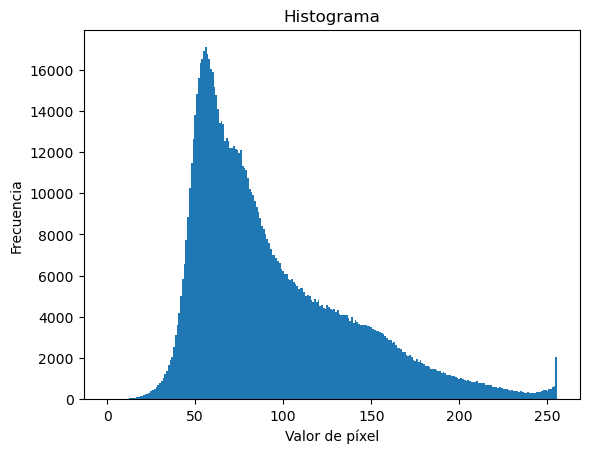

In [3]:
img = cv2.imread('ISS_Spain_IslaCristina_monobanda.jpg', cv2.IMREAD_GRAYSCALE)
histograma = calcular_histograma(img)

plt.figure()
plt.title('Histograma')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.bar(np.arange(256), histograma, width=1.0)
plt.show()

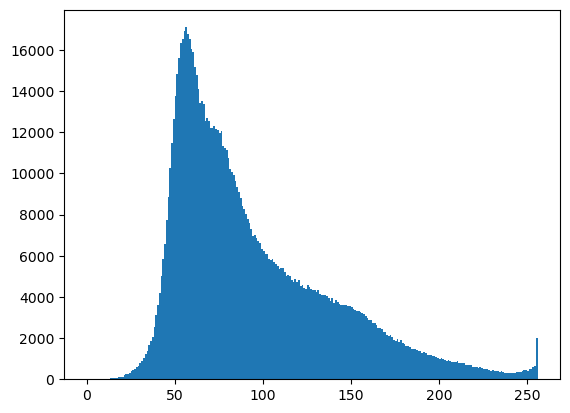

In [4]:
histograma_inicial= plt.hist(img.ravel(),256,[0,256])
plt.show(histograma_inicial)

In [5]:
#Ejercicio 2

In [6]:
def expan (img, cmin, cmax):
    resimg = img.copy()
    ancho, alto = resimg.shape
    for x in range(ancho):
        for y in range(alto):
            px = resimg[x, y]
            if px <= cmin:
                resimg[x, y] = 0
            elif px >= cmax:
                resimg[x, y] = 255
            else:
                npx = (0+(px-cmin)*(255-cmin))/(cmax-cmin)
                resimg[x, y] = npx
    return resimg

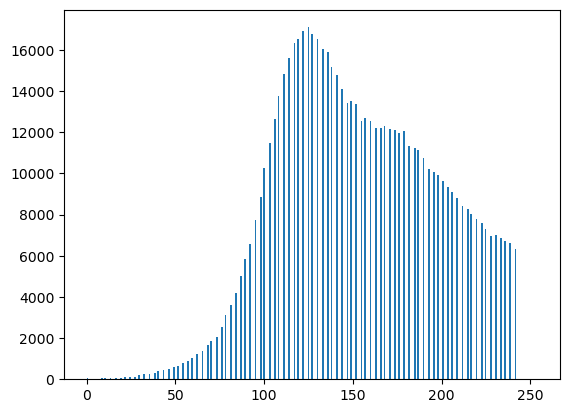

In [7]:
img_exp = expan(img, 10,100)
plt.hist(img_exp.ravel(), 255,[0,254], width=1); plt.show()

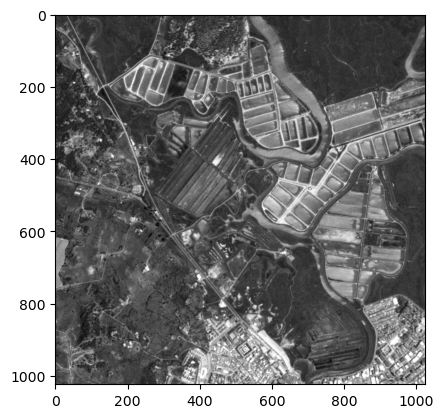

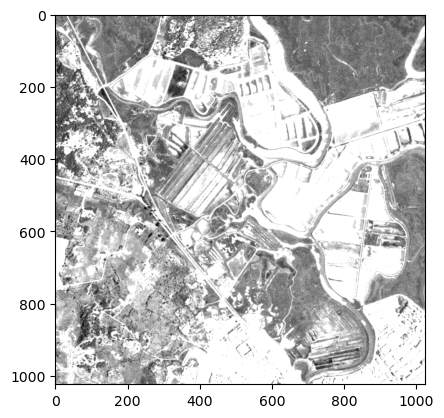

In [8]:
plt.figure(1)
plt.imshow(img, cmap='gray')

plt.figure(2)
plt.imshow(img_exp, cmap='gray')

In [9]:
#Ejercicio 3 (He hecho una aproximación, porque no se me ocurría la manera de despreciar x pixeles de y frecuencia)

In [10]:
def corte(img, porc):
    histograma = calcular_histograma(img)
    px_totales = img.size
    min_val = px_totales*porc
    max_val = px_totales*(1-porc)
    cmin = 0
    cmax = 0
    ac = 0
    for v in histograma:
        ac += v
        if ac <= min_val:
            cmin += 1
        if ac <= max_val:
            cmax += 1
    resimg = expan (img, cmin, cmax)
    return resimg

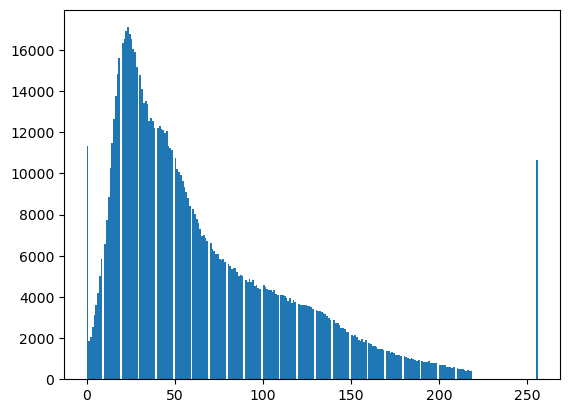

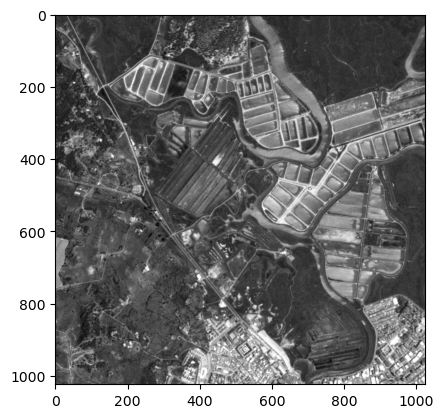

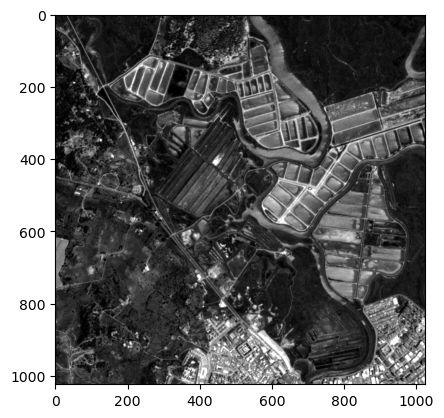

In [11]:
img_exp = corte(img, 0.01)

plt.hist(img_exp.ravel(),256,[0,256], width=1)
plt.show()

plt.figure(1)
plt.imshow(img, cmap='gray')

plt.figure(2)
plt.imshow(img_exp, cmap='gray')

In [12]:
#Ejercicio 4

In [13]:
def ecual(img):
    resimg = img.copy()
    ancho, alto = resimg.shape
    frec_abs = calcular_histograma(resimg)
    frec_acum = np.cumsum(frec_abs)
    fe = 255/resimg.size
    
    frec_ideal = frec_acum * fe
    
    frec_escal = np.rint(frec_ideal)
    
    for x in range(ancho):
            for y in range(alto):
                resimg[x][y] = frec_escal[img[x][y]]
    
    return resimg

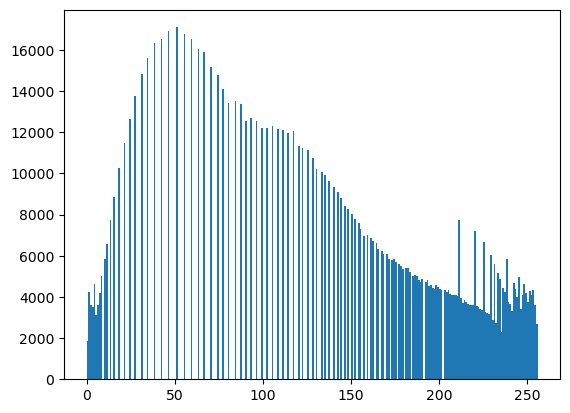

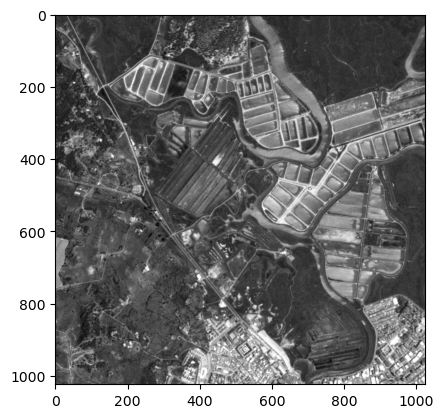

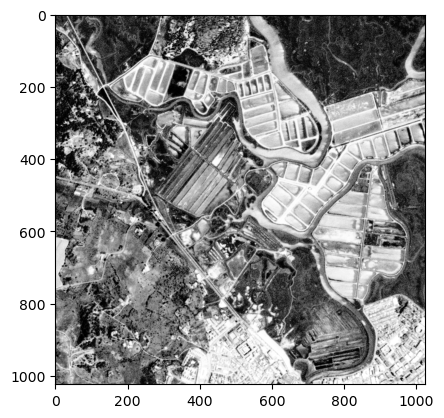

In [14]:
img_exp = ecual(img)

plt.hist(img_exp.ravel(),256,[0,256], width=1)
plt.show()

plt.figure(1)
plt.imshow(img, cmap='gray')

plt.figure(2)
plt.imshow(img_exp, cmap='gray')